In [1]:
!pip install opencv-python matplotlib numpy


In [10]:
from google.colab import files
uploaded = files.upload()


Saving img2.jpg to img2.jpg


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [20]:
def count_and_mask(image_path):
    image = cv2.imread(image_path)
    orig = image.copy()

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    _, thresh = cv2.threshold(
        blur, 0, 255,
        cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    kernel = np.ones((3, 3), np.uint8)
    clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    clean = cv2.morphologyEx(clean, cv2.MORPH_CLOSE, kernel, iterations=2)

    contours, _ = cv2.findContours(
        clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    mask = np.zeros_like(gray)
    count = 0

    for cnt in contours:
        area = cv2.contourArea(cnt)

        if 150 < area < 5000:
            count += 1
            cv2.drawContours(mask, [cnt], -1, 255, -1)
            cv2.drawContours(orig, [cnt], -1, (0, 255, 0), 2)

    return orig, mask, count


In [21]:
image_path = "img2.jpg"

overlay, mask, count = count_and_mask(image_path)
print("Detected Objects:", count)


Detected Objects: 43


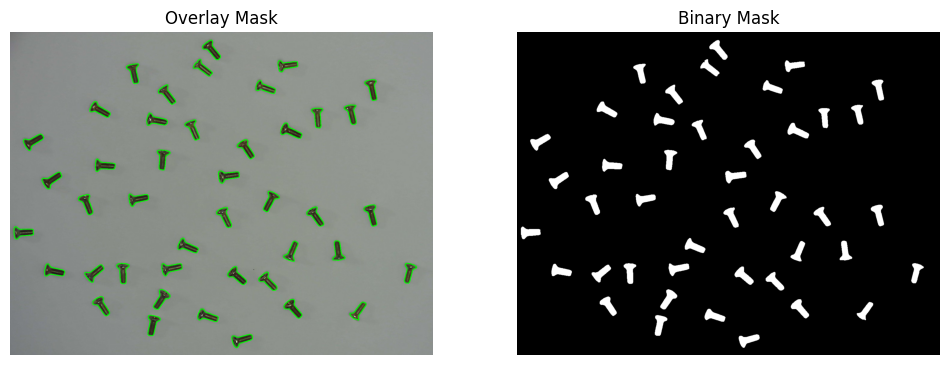

In [22]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Overlay Mask")
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Binary Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.show()


In [23]:
ground_truth = 43
accuracy = 1 - abs(count - ground_truth) / ground_truth
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%
